#### Logistic Regression using MNIST dataset 

In [37]:
#import
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [38]:
#dataset
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

In [39]:
len(train_dataset)

60000

In [40]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [41]:
type(train_dataset[0])

tuple

In [42]:
# Input Matrix Tuple of (Image, Label)
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [43]:
# Label
train_dataset[0][1]

5

In [44]:
#import
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [45]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [46]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)

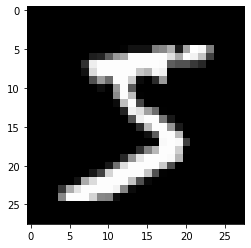

In [47]:
plt.imshow(show_img, cmap='gray')

In [48]:
# Label
train_dataset[0][1]

5

In [49]:
#Loading MNIST Test Dataset
test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

In [50]:
len(test_dataset)

10000

In [51]:
type(test_dataset[0])

tuple

In [52]:
# Image Matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

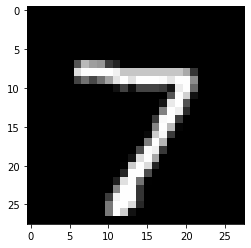

In [53]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [54]:
# Label
test_dataset[0][1]

7

#### Make Dataset Iterable

* totaldata : 60000
* minibatch : 100
    * Number of examples in 1 iteration
* iterations : 3000
    * 1 iteration : one mini batch forward & backward pass
* epochs
    * 1 epoch : running through the whole dataset once
    * total : (iterations * minibatch) / totaldata = 5

In [55]:
len(train_dataset)

60000

In [56]:
batch_size = 100
n_iters = 3000

In [57]:
num_epochs = (n_iters * batch_size) / len(train_dataset)
num_epochs = int(num_epochs)
num_epochs

5

In [58]:
#Create Iterable Object : Training Dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size,
                                           shuffle=True)

In [59]:
#Check Iterability
import collections
isinstance(train_loader, collections.Iterable)

True

In [60]:
#Create Iterable Object : Testing Dataset
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size,
                                           shuffle=False)

In [61]:
#Check Iterability
import collections
isinstance(test_loader, collections.Iterable)

True

#### Building Model

In [62]:
#Define Logistic Regression
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [63]:
# size of images
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [64]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

In [65]:
## CHANGES FOR GPU VERSION
if torch.cuda.is_available():
    model.cuda()

####  Loss Class

In [66]:
# Logistic regression has cross entropy loss (linear regression has MSE)
criterion = nn.CrossEntropyLoss()

####  Instantiate Optimizer Class

In [67]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [68]:
#Parameters In-Depth
print(model.parameters())

print(len(list(model.parameters())))

# FC 1 Parameters
print(list(model.parameters())[0].size())

# FC 2 Bias Parameters
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x000001E7D3CD9648>
2
torch.Size([10, 784])
torch.Size([10])


#### Train Model

In [69]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 28*28).cuda())
            labels = Variable(labels.cuda())
        else:
            break
#         else:
#             images = Variable(images.view(-1, 28*28))
#             labels = Variable(labels)
    
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
    
        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss : softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images as Variable
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, 28*28).cuda())
                else:
                    images = Variable(images.view(-1, 28*28))                    

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                ## To USE THE SUM FUNCTION, YOU HAVE TO GET THIS TO CPU FOR CALCULATING CORRECT
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data.item(), accuracy))

Iteration: 500. Loss: 1.8552664518356323. Accuracy: 70
Iteration: 1000. Loss: 1.5180925130844116. Accuracy: 77
Iteration: 1500. Loss: 1.2884418964385986. Accuracy: 80
Iteration: 2000. Loss: 1.1620012521743774. Accuracy: 81
Iteration: 2500. Loss: 1.1387678384780884. Accuracy: 82
Iteration: 3000. Loss: 0.953010618686676. Accuracy: 83


In [70]:
save_model = False
if save_model is True:
    # Save only parameters
    torch.save(model.state_dict(), "logistic_CUDA.pkl")